In [ ]:
from typing import cast

import sqil_core as sqil
from sqil_core.config_log import logger

# Connect to the server and retrieve instruments
server, instruments = sqil.experiment.link_instrument_server()

# Check available instruments
logger.info("Connected to the instruments server")
logger.info(f" instruments: {list(instruments.keys())}")

# Do something
sgs = cast(sqil.experiment.LocalOscillator, instruments["sgs"])
logger.debug("Requesting SGS frequency change to 11 GHz")
sgs.set_frequency(11e9)
# sgs.device


# Disconnect from the instrument server and release variables
sqil.experiment.unlink_instrument_server(server, **instruments)

In [4]:
sgs.device

NoneType

In [2]:
import sqil_core as sqil

class Test(sqil.experiment.ExperimentHandler):
    def sequence(self):
        print("Hello")

t = Test()
t.run()

d83032f5404fd42a4fe88c4f0a86f896af5e30f773822cc5889fc436cacea6a5 d83032f5404fd42a4fe88c4f0a86f896af5e30f773822cc5889fc436cacea6a5
[2025.05.11 11:11:26.048] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\measurements\laboneq_output\log
[2025.05.11 11:11:26.061] INFO    VERSION: laboneq 2.51.0
[2025.05.11 11:11:26.064] INFO    Connecting to data server at localhost:8004
[2025.05.11 11:11:26.073] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.0.628 at localhost:8004
[2025.05.11 11:11:26.080] WARNING SHFQC/QA:dev12183: Include the device options 'SHFQC/QC4CH' in the device setup ('options' field of the 'instruments' list in the device setup descriptor, 'device_options' argument when constructing instrument objects to be added to 'DeviceSetup' instances). This will become a strict requirement in the future.
[2025.05.11 11:11:26.086] INFO    Configuring the device setup
[2025.

2025-05-11 11:11:26,098 - INFO - Turning on local oscillators before experiment


Hello


2025-05-11 11:11:26,100 - INFO - Turning off local oscillators after experiment


2025-05-12 17:56:49,680 - INFO - Connecting to SGSA100 (RohdeSchwarzSGS100A)


Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/114907, firmware:4.2.366.0-5.00.232.72) in 0.04s


2025-05-12 17:56:49,723 - INFO - Successfully connected to SGSA100
2025-05-12 17:56:49,724 - INFO - Successfully connected to zi


[2025.05.12 17:56:49.729] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\measurements\laboneq_output\log
[2025.05.12 17:56:49.731] INFO    VERSION: laboneq 2.51.0
[2025.05.12 17:56:49.732] INFO    Connecting to data server at localhost:8004
[2025.05.12 17:56:49.735] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.0.628 at localhost:8004
[2025.05.12 17:56:49.740] WARNING SHFQC/QA:dev12183: Include the device options 'SHFQC/QC4CH' in the device setup ('options' field of the 'instruments' list in the device setup descriptor, 'device_options' argument when constructing instrument objects to be added to 'DeviceSetup' instances). This will become a strict requirement in the future.
[2025.05.12 17:56:49.744] INFO    Configuring the device setup
[2025.05.12 17:56:49.751] INFO    The device setup is configured


2025-05-12 17:56:49,753 - INFO - Turning on local oscillators before experiment
2025-05-12 17:56:49,755 - INFO - Setting frequency to 11000000000.0 for SGSA100


[2025.05.12 17:56:49.758] INFO    Starting LabOne Q Compiler run...
[2025.05.12 17:56:49.778] INFO    Schedule completed. [0.018 s]
[2025.05.12 17:56:49.813] INFO    Code generation completed for all AWGs. [0.035 s]
[2025.05.12 17:56:49.815] INFO    Completed compilation step 1 of 1. [0.056 s]
[2025.05.12 17:56:49.818] INFO     ─────────────────────────────────────────────────────────────────────── 
[2025.05.12 17:56:49.820] INFO      Device              AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.05.12 17:56:49.821] INFO     ─────────────────────────────────────────────────────────────────────── 
[2025.05.12 17:56:49.822] INFO      SHFQC_dev12183        0         21            0           1      8000  
[2025.05.12 17:56:49.823] INFO      SHFQC_dev12183_sg     0          4            1           0         0  
[2025.05.12 17:56:49.823] INFO     ─────────────────────────────────────────────────────────────────────── 
[2025.05.12 17:56:49.824] INFO      TOTAL                

2025-05-12 17:56:50,684 - INFO - Turning off local oscillators after experiment


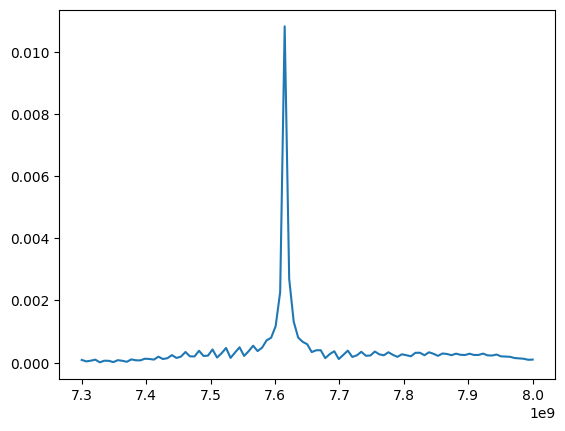

In [ ]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt
# from rr_spec import create_experiment
from laboneq.dsl.quantum import QPU
from laboneq_applications.qpu_types.tunable_transmon import (
    TunableTransmonOperations,
    TunableTransmonQubit,
)
from helpers.sqil_transmon.qubit import SqilTransmon
from helpers.sqil_transmon.operations import SqilTransmonOperations

from laboneq_applications.experiments.options import (
    ResonatorSpectroscopyExperimentOptions,
)
from laboneq_applications.core import validation
from laboneq.dsl.enums import AcquisitionType
from laboneq.simple import Experiment, SweepParameter, dsl

from laboneq.dsl.quantum.quantum_element import QuantumElement
from numpy.typing import ArrayLike

# qubits = SqilTransmon.from_device_setup(self.zi_setup)
# quantum_operations = SqilTransmonOperations()
# qpu = QPU(qubits=qubits, quantum_operations=quantum_operations)


@dsl.qubit_experiment
def create_experiment(
    qpu: QPU,
    qubit: QuantumElement,
    frequencies: ArrayLike,
    options: ResonatorSpectroscopyExperimentOptions | None = None,
) -> Experiment:
    # Define the custom options for the experiment
    opts = ResonatorSpectroscopyExperimentOptions() if options is None else options
    qubit, frequencies = validation.validate_and_convert_single_qubit_sweeps(
        qubit, frequencies
    )
    # guard against wrong options for the acquisition type
    if AcquisitionType(opts.acquisition_type) != AcquisitionType.SPECTROSCOPY:
        raise ValueError(
            "The only allowed acquisition_type for this experiment"
            "is 'AcquisitionType.SPECTROSCOPY' (or 'spectrsocopy')"
            "because it contains a sweep"
            "of the frequency of a hardware oscillator.",
        )

    qop = qpu.quantum_operations
    with dsl.acquire_loop_rt(
        count=opts.count,
        averaging_mode=opts.averaging_mode,
        acquisition_type=opts.acquisition_type,
        repetition_mode=opts.repetition_mode,
        repetition_time=opts.repetition_time,
        reset_oscillator_phase=opts.reset_oscillator_phase,
    ):
        with dsl.sweep(
            name=f"freq_{qubit.uid}",
            parameter=SweepParameter(f"frequencies_{qubit.uid}", frequencies),
        ) as frequency:
            qop.set_frequency(qubit, frequency=frequency, readout=True)
            if opts.use_cw:
                qop.acquire(qubit, dsl.handles.result_handle(qubit.uid))
            else:
                qop.measure(qubit, dsl.handles.result_handle(qubit.uid))
            qop.delay(qubit, opts.spectroscopy_reset_delay)


class Test(sqil.experiment.ExperimentHandler):

    def sequence(self, qu_idx, frequencies):
        self.qpu.qubits[qu_idx].update(
            **{
                "drive_lo_frequency": 5e9,
                "readout_lo_frequency": 7.2e9,
                "readout_resonator_frequency": 7.4e9,
            }
        )
        return create_experiment(self.qpu, self.qpu.qubits[qu_idx], frequencies)

    def analyze(self, result, *params, **kwargs):
        data = result["q0"]["result"].data
        # plt.plot(np.real(data), np.imag(data))
        plt.plot(params[1], np.abs(data))

t = Test()
result = t.run(0, np.linspace(7.3e9, 8e9, 101))
# sweep={'ro_power': np.linspace(-40, -15, 2)}

In [7]:
import inspect


def map_inputs(func):
    """Extracts parameter names and keyword arguments from a function signature."""
    sig = inspect.signature(func)
    params = {}
    kwargs = []

    for index, (name, param) in enumerate(sig.parameters.items()):
        if param.default == inspect.Parameter.empty:
            # Positional or required argument
            params[name] = index
        else:
            # Keyword argument
            kwargs.append(name)

    return params, kwargs

params, kwargs = map_inputs(t.sequence)
print("params =", params)
print("kwargs =", kwargs)

params = {'qu_idx': 0, 'frequencies': 1}
kwargs = []


In [ ]:
from plottr.data.datadict import DataDict


def build_plottr_dict(db_schema):
    """Create a DataDict object from the given schema."""
    axes = []
    db = {}

    data_key = 'data'
    data_unit = ""

    for key, value in db_schema.items():
        if value.get("type") == "axis":
            unit = value.get("unit", "")
            db[key] = dict(unit=unit)
            axes.append(key)
        elif value.get("type") == "data":
            data_key = key
            data_unit = value.get("unit", "")
    db[data_key] = dict(axes=axes, unit=data_unit)

    datadict =  DataDict(**db)
    datadict.add_meta("schema", db_schema)

    return datadict


# Example Usage:
db_schema = {"data": {"type": "data"}, "frequencies": {"type": "axis", "unit": "Hz"}}

plottr_dict = build_plottr_dict(db_schema)
print(plottr_dict)

data: (0,)
  ⌙ frequencies (Hz): (0,)


In [ ]:
from laboneq import serializers
from laboneq.contrib.example_helpers.generate_descriptor import generate_descriptor
from laboneq.dsl.quantum import QPU
from laboneq.simple import DeviceSetup
from laboneq_applications.qpu_types.tunable_transmon import (
    TunableTransmonOperations,
    TunableTransmonQubit,
)
from laboneq.dsl.session import Session

from helpers.laboneq import print_qpu_signals

from laboneq_applications.experiments import resonator_spectroscopy
from laboneq_applications.experiments.options import TuneUpWorkflowOptions
import matplotlib.pyplot as plt

# Zurich instruments stetup
zi_descriptor = generate_descriptor(
    shfqc_6=["dev12183"],
    number_data_qubits=1,
    number_flux_lines=0,
    include_cr_lines=False,
    multiplex=True,
    number_multiplex=1,
    get_zsync=False,
    ip_address="localhost",
)

zi_setup = DeviceSetup.from_descriptor(zi_descriptor, "localhost")
zi_session = Session(zi_setup)
zi_session.connect()

qubits = TunableTransmonQubit.from_device_setup(zi_setup)
quantum_operations = TunableTransmonOperations()
qpu = QPU(qubits=qubits, quantum_operations=quantum_operations)

qpu.qubits[0].update(**{"drive_lo_frequency": 5e9})
qpu.qubits[0].update(**{"readout_lo_frequency": 7.2e9})
qpu.qubits[0].update(**{"readout_resonator_frequency": 7.4e9})

experiment_workflow = resonator_spectroscopy.experiment_workflow(
    session=zi_session,
    qpu=qpu,
    qubit=qubits[0],
    frequencies=np.linspace(7.3e9, 8e9, 101),
    options={"do_analysis":True}
)

workflow_result = experiment_workflow.run()
plt.show()

[2025.05.11 19:39:49.915] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\measurements\laboneq_output\log
[2025.05.11 19:39:49.917] INFO    VERSION: laboneq 2.51.0
[2025.05.11 19:39:49.918] INFO    Connecting to data server at localhost:8004
[2025.05.11 19:39:49.920] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.0.628 at localhost:8004
[2025.05.11 19:39:49.926] WARNING SHFQC/QA:dev12183: Include the device options 'SHFQC/QC4CH' in the device setup ('options' field of the 'instruments' list in the device setup descriptor, 'device_options' argument when constructing instrument objects to be added to 'DeviceSetup' instances). This will become a strict requirement in the future.
[2025.05.11 19:39:49.931] INFO    Configuring the device setup
[2025.05.11 19:39:49.938] INFO    The device setup is configured


In [7]:
analysis_workflow_results = workflow_result.tasks["analysis_workflow"]
analysis_workflow_results.output

{'old_parameter_values': {'q0': {'readout_resonator_frequency': 7400000000.0}},
 'new_parameter_values': {'q0': {'readout_resonator_frequency': 7307000000.0+/-0}}}